In [2]:
import training.utils.dataloader as dl
import training.utils.helper as utils
import torchvision.utils as tvls

data_config = utils.load_json("config/training/data.json")
dataset_config = data_config["celeba"]

train_set = dl.ImageFolder(
                config=dataset_config,
                file_path=dataset_config["train_file"],
                mode="train",
            )

Load 27018 images


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def extract_one_image_per_label(dataset, labels_to_extract):
    images = []

    for label in labels_to_extract:
        indices = [idx for idx, (_, l) in enumerate(dataset) if l == label]
        if indices:
            image = dataset[indices[0]][0]
            images.append(image)

    return images

selected_labels = np.arange(60)
images = extract_one_image_per_label(train_set, selected_labels)

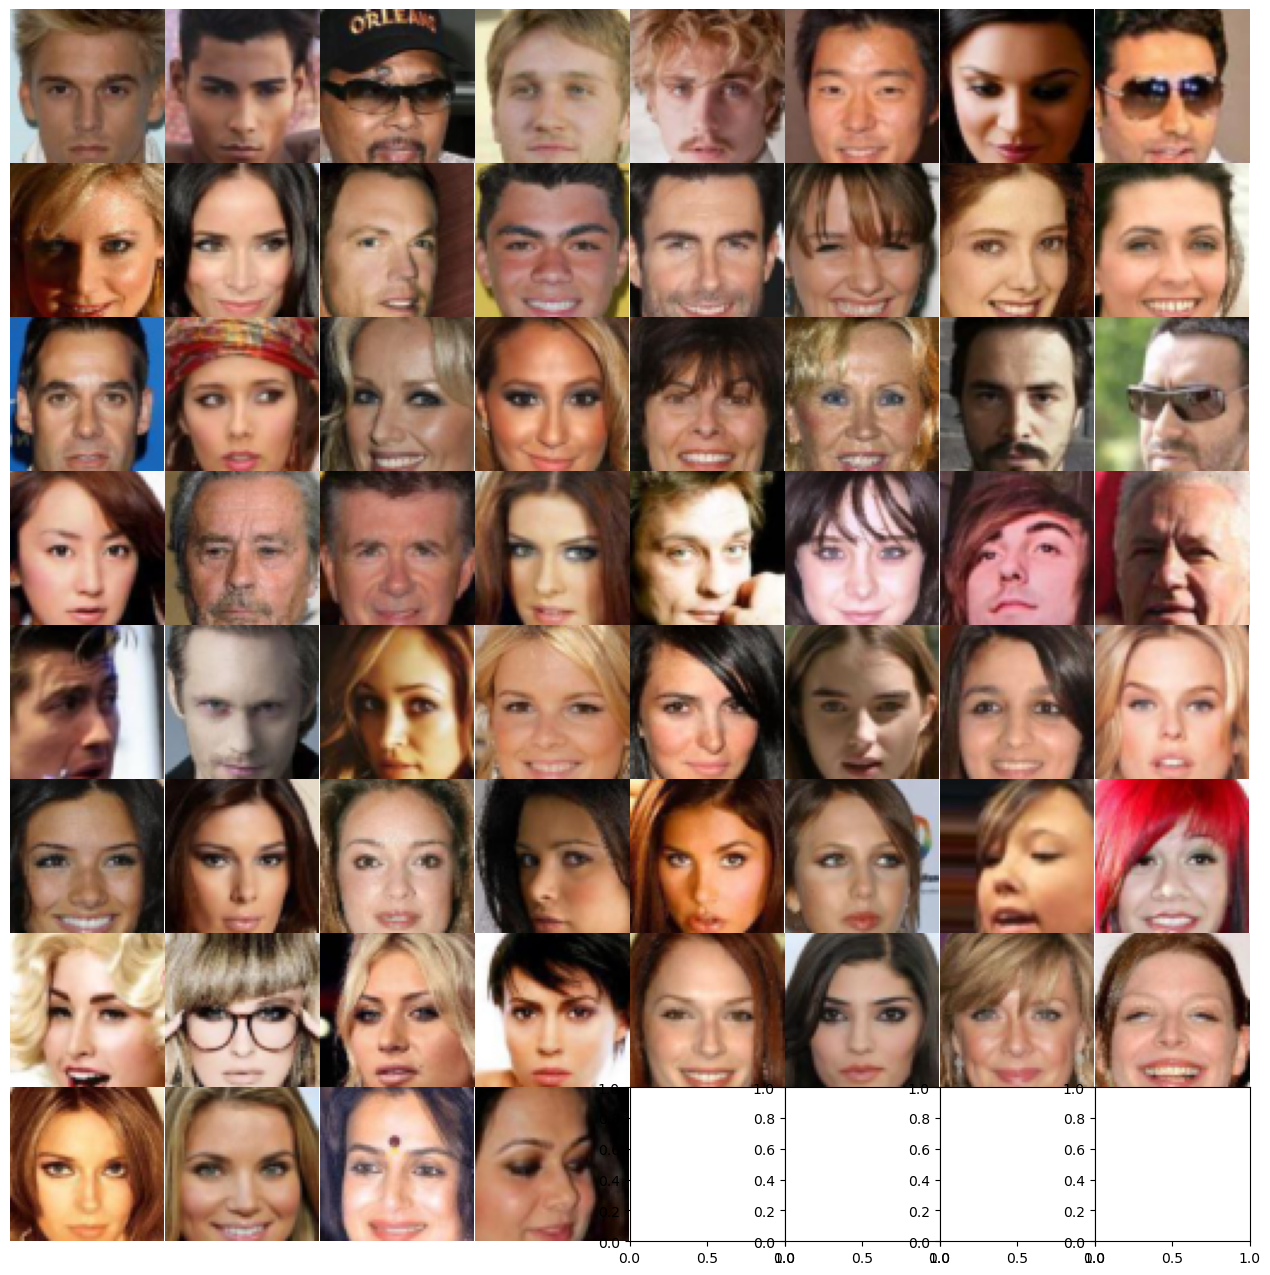

In [13]:
num_columns = 8
num_rows = (len(selected_labels) + num_columns - 1) // num_columns

fig, axs = plt.subplots(num_rows, num_columns, figsize=(16, 16))
fig.subplots_adjust(wspace=0, hspace=0)

for i, img in enumerate(images):
    axs[i // num_columns, i % num_columns].imshow(np.transpose(img.numpy(), (1, 2, 0)))
    axs[i // num_columns, i % num_columns].axis('off')

plt.show()